# Topic Modelling using LDA (Gensim Library)

## Description
Here, we have implemented several classes to make the process of topic modelling easier:
- Bookshelf: It consists several book object (from class Book). Bookshelf enable managing one or multiple book and transforming their contents into dictionary and pandas dataframe format.
- Book: It consistent of processed information of a book. A book has a name, a reference to text file containing the textual contents, and some additional metadata such as how to trim the unwanted text from start and end of the textual content, how to divide it into parts (based on starting sentence or heading of each part) and finally how identify the paragraphs - here default is just by splitting based on tab '\t', having a certain a minimum threshold of word counts.
- Processor: It's a class that orchestrate a series of preprocessing steps. This can be configured to make a suitable pipline.
- LDAModel: LDA model a wrapper class Gensim that take a pandas dataframe format from bookshelf, perform preprocessing, plot c_v and u_mass measures to help you find optimum number for number of topics and finally create topics and label the dominant topic and the percentage of contribution of the dominant topic for each paragraph
- Sentiment: is a class with several functions that takes a paragraph and derive the sentiment results from flair. 
- BookVis: This class combines the results of LDA model and sentiment model with the hierarchy captured in Bookshelf: shelf > books > parts > paragraphs and create several plots in each level.
## Dependencies
- pandas
- gensim
- matplotlib
- seaborn
- pyLDAvis
- flair
- spacy (run: 'python -m spacy download en_core_web_md' after installation)

## Setup

Loading the custom classes and other dependencies

In [1]:
# dependencies
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_md")

# custom classes
from book import BookShelf
from lda import LDAModel

## Bookshelf
Creating a default bookshelf containing the five books - note that you can add books to bookshelf if you want it is needed in the future. Just check the implementation of the bookshelf and how the five books are already added there.

Process:
1. reading the books in bookshelf and creatign the trimmed version, finding parts and paragraphs in each part.
2. creating the dataframe for a selected book or all of them


In [2]:
bookshelf = BookShelf.read_menopause_books()

INFO:root:Bookshelf: - start checking the book files
INFO:root:		text are trimmed - Hormone Repair Manual
INFO:root:		10 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 1157

INFO:root:	Hormone Repair Manual is preprocessed...
INFO:root:		text are trimmed - Next Level
INFO:root:		19 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 981

INFO:root:	Next Level is preprocessed...
INFO:root:		text are trimmed - Queen Menopause
INFO:root:		12 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 924

INFO:root:	Queen Menopause is preprocessed...
INFO:root:		text are trimmed - The Menopause Manifesto
INFO:root:		30 parts are identified
INFO:root:		paragraphs are identified, total number of paragraphs in this book: 1214

INFO:root:	The Menopause Manifesto is preprocessed...
INFO:root:		text are trimmed - Menopausing
INFO:root:		15 parts are ide

In [3]:
all_book_df = bookshelf.create_corpus_df()  # create a dataframe for all the books in the bookshelf

In [4]:
all_book_df.head()  # showing first five records

,book,chapter,paragraph_number,paragraph
0,Hormone Repair Manual,1,1,Hormone revolution:\n\n\n\n\n\nwhy everything ...
1,Hormone Repair Manual,1,2,This book is about both the process of perimen...
2,Hormone Repair Manual,1,3,"First, understand that symptoms (if you experi..."
3,Hormone Repair Manual,1,4,"Next, understand that perimenopause is not jus..."
4,Hormone Repair Manual,1,5,"Finally, know that perimenopause and the early..."


## LDA Model

Process:

1. Creating a LDAModel object and passing the dataframe of books into it. 
2. Preprocessing the text in the paragraphs
3. Creating a bag-of-word representation 
4. Checking the coherence measures to find optimum numbers of topics
5. Creating the LDA model using optimum number of topics
6. Label the paragraphs based on dominant topic and its precentage of contributions 

In [5]:
lda_model = LDAModel(all_book_df)

In [6]:
lda_model.preprocess()  # potential arguments should be discuss here

preprocessing workflow started...


In [7]:
lda_model.create_bow_model() # potential arguments should be discuss here

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<4496 unique tokens: ['begins', 'changing', 'event', 'everything', 'forties']...> from 5460 documents (total 128059 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<4496 unique tokens: ['begins', 'changing', 'event', 'everything', 'forties']...> from 5460 documents (total 128059 corpus positions)", 'datetime': '2023-06-10T15:09:06.650639', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.corpora.dictionary:discarding 496 tokens: [('revolution', 5), ('teen', 5), ("''i", 4), ('rita', 4), ('detect', 5), ('mosconi', 4), ('neurosteroid', 5), ('permission', 5), ('sonia', 4), ('obama', 5)]...
INFO:gensim.corpora.dictionary:keeping 4000 tokens which were in no less than 5 and no more than 1092000 (=20000.0%) docum

INFO:gensim.models.ldamodel:using symmetric alpha at 1.0
INFO:gensim.models.ldamodel:using symmetric eta at 1.0
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 1 topics, 10 passes over the supplied corpus of 5460 documents, updating every 16000 documents, evaluating every ~5460 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (1.000): 0.002*"longer" + 0.002*"estradiol" + 0.002*"effect" + 0.002*"year" + 0.002*"natural" +

INFO:gensim.models.ldamodel:topic diff=0.000004, rho=0.280276
INFO:gensim.models.ldamodel:-7.918 per-word bound, 241.9 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=1, decay=0.5, chunksize=2000> in 4.73s', 'datetime': '2023-06-10T15:09:11.445276', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 5536 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.5
INFO:gensim.models.ldamodel:using symmetric eta at 

INFO:gensim.models.ldamodel:topic diff=0.093848, rho=0.320585
INFO:gensim.models.ldamodel:-7.903 per-word bound, 239.3 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.003*"talk" + 0.002*"hard" + 0.002*"i'd" + 0.002*"got" + 0.002*"year" + 0.002*"put" + 0.002*"own" + 0.002*"bit" + 0.002*"thing" + 0.002*"""
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.003*"estradiol" + 0.003*"system" + 0.003*"gut" + 0.003*"effect" + 0.002*"inflammation" + 0.002*"natural" + 0.002*"supplements" + 0.002*"magnesium" + 0.002*"uterus" + 0.002*"testosterone"
IN

INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.003*"hard" + 0.002*"come" + 0.002*"talk" + 0.002*"said" + 0.002*"months" + 0.002*"you've" + 0.002*"i'd" + 0.002*"bit" + 0.002*"thing" + 0.002*"yourself"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.003*"estradiol" + 0.003*"system" + 0.003*"iron" + 0.002*"natural" + 0.002*"helps" + 0.002*"effect" + 0.002*"inflammation" + 0.002*"history" + 0.002*"magnesium" + 0.002*"works"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.003*"osteoporosis" + 0.003*"conditions" + 0.003*"uterus" + 0.002*"ovaries" + 0.002*"related" + 0.002*"depression" + 0.002*"vagina" + 0.002*"associated" + 0.002*"gut" + 0.002*"consider"
INFO:gensim.models.ldamodel:topic diff=0.146787, rho=0.385472
INFO:gensim.models.ldamodel:-8

INFO:gensim.models.ldamodel:topic diff=0.100157, rho=0.280276
INFO:gensim.models.ldamodel:-7.852 per-word bound, 231.1 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=3, decay=0.5, chunksize=2000> in 9.60s', 'datetime': '2023-06-10T15:09:33.102072', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 5536 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.25
INFO:gensim.models.ldamodel:using symmetric eta at

INFO:gensim.models.ldamodel:topic #3 (0.250): 0.003*"medication" + 0.003*"forty" + 0.003*"year" + 0.003*"effective" + 0.002*"medicine" + 0.002*"pill" + 0.002*"four" + 0.002*"average" + 0.002*"contraception" + 0.002*"medications"
INFO:gensim.models.ldamodel:topic diff=0.185266, rho=0.359675
INFO:gensim.models.ldamodel:-8.024 per-word bound, 260.2 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.003*"hard" + 0.003*"talk" + 0.003*"bit" + 0.003*"got" + 0.003*"yourself" + 0.003*"said" + 0.003*"i'd" + 0.002*"remember" + 0.002*"thing" + 0.002*"p

INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 5536 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 10 passes over the supplied corpus of 5460 documents, updating every 16000 documents, evaluating every ~5460 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:t

INFO:gensim.models.ldamodel:topic #3 (0.200): 0.003*"forty" + 0.003*"medication" + 0.003*"effective" + 0.003*"i'd" + 0.003*"medications" + 0.003*"pill" + 0.003*"contraception" + 0.002*"ovarian" + 0.002*"average" + 0.002*"four"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.004*"estradiol" + 0.004*"oil" + 0.003*"natural" + 0.003*"products" + 0.003*"water" + 0.003*"muscles" + 0.003*"year" + 0.003*"mass" + 0.003*"alcohol" + 0.002*"g"
INFO:gensim.models.ldamodel:topic diff=0.219478, rho=0.359675
INFO:gensim.models.ldamodel:-8.072 per-word bound, 269.0 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #2 = documents up to #5460/5460, outstanding q

INFO:gensim.models.ldamodel:topic #3 (0.200): 0.005*"forty" + 0.004*"medication" + 0.004*"pill" + 0.004*"effective" + 0.004*"medications" + 0.003*"year" + 0.003*"history" + 0.003*"data" + 0.003*"medicine" + 0.003*"average"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.006*"products" + 0.005*"estradiol" + 0.005*"oil" + 0.004*"muscles" + 0.004*"water" + 0.004*"mass" + 0.004*"strength" + 0.004*"alcohol" + 0.004*"natural" + 0.004*"g"
INFO:gensim.models.ldamodel:topic diff=0.163513, rho=0.280276
INFO:gensim.models.ldamodel:-7.921 per-word bound, 242.4 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=5, decay=0.5, chunksize=2000> in 10.00s', 'datetime': '2023-06-10T15:09:55.556032', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.topic_coheren

INFO:gensim.models.ldamodel:topic diff=0.260043, rho=0.385472
INFO:gensim.models.ldamodel:-8.194 per-word bound, 292.9 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.006*"uterus" + 0.004*"conditions" + 0.004*"pelvic" + 0.004*"depression" + 0.004*"ovaries" + 0.004*"vagina" + 0.004*"osteoporosis" + 0.004*"endometriosis" + 0.004*"iud" + 0.004*"bladder"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.005*"iron" + 0.005*"magnesium" + 0.004*"helps" + 0.004*"system" + 0.004*"testosterone" + 0.004*"effect" + 0.003*"cells" + 0.003*"works" + 0.00

INFO:gensim.models.ldamodel:topic diff=0.209346, rho=0.291979
INFO:gensim.models.ldamodel:-7.990 per-word bound, 254.2 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.008*"uterus" + 0.006*"conditions" + 0.006*"vagina" + 0.006*"depression" + 0.006*"ovaries" + 0.005*"osteoporosis" + 0.005*"pelvic" + 0.005*"lining" + 0.005*"endometriosis" + 0.005*"bladder"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.004*"talk" + 0.004*"bit" + 0.004*"hard" + 0.004*"got" + 0.003*"i'd" + 0.003*"thing" + 0.003*"doing" + 0.003*"own" + 0.003*"yourself" + 0.00

INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.004*"medication" + 0.003*"forty" + 0.003*"effective" + 0.003*"contraception" + 0.003*"ovarian" + 0.003*"pill" + 0.003*"medications" + 0.003*"medicine" + 0.003*"four" + 0.003*"dryness"
INFO:gensim.models.ldamodel:topic #2 (0.143): 0.005*"uterus" + 0.004*"vagina" + 0.004*"gut" + 0.004*"pelvic" + 0.003*"depression" + 0.003*"ovaries" + 0.003*"bacteria" + 0.003*"bladder" + 0.003*"iud" + 0.003*"endometriosis"
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.004*"natural" + 0.004*"year" + 0.004*"estradiol" + 0.003*"mass" + 0.003*"alcohol" + 0.003*"water" + 0.003*"muscles" + 0.003*"products" + 0.003*"strength" + 0.003*"phase"
INFO:gensim.models.ldamodel:topic #0 (0.143): 0.004*"hard" + 0.004*"she's" + 

INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.005*"g" + 0.005*"remember" + 0.004*"yourself" + 0.004*"give" + 0.004*"anger" + 0.004*"mind" + 0.003*"old" + 0.003*"children" + 0.003*"minutes" + 0.003*"aging"
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.005*"medication" + 0.005*"forty" + 0.005*"effective" + 0.005*"pill" + 0.005*"medications" + 0.004*"ovarian" + 0.004*"medicine" + 0.004*"risks" + 0.004*"contraception" + 0.004*"average"
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.006*"muscles" + 0.006*"mass" + 0.006*"products" + 0.006*"strength" + 0.005*"water" + 0.004*"osteoporosis" + 0.004*"density" + 0.004*"natu

INFO:gensim.models.ldamodel:topic #6 (0.125): 0.005*"d" + 0.004*"conditions" + 0.004*"histamine" + 0.004*"talk" + 0.003*"iodine" + 0.003*"fatty" + 0.003*"we'll" + 0.003*"associated" + 0.003*"autoimmune" + 0.003*"everything"
INFO:gensim.models.ldamodel:topic #1 (0.125): 0.006*"iron" + 0.004*"helps" + 0.004*"magnesium" + 0.004*"migraines" + 0.003*"effect" + 0.003*"desire" + 0.003*"supplement" + 0.003*"estradiol" + 0.003*"cells" + 0.003*"acid"
INFO:gensim.models.ldamodel:topic #0 (0.125): 0.004*"hard" + 0.004*"she's" + 0.003*"come" + 0.003*"support" + 0.003*"eat" + 0.003*"products" + 0.002*"understand" + 0.002*"bit" + 0.002*"his" + 0.002*"bed"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.004*"estradiol" + 0.004*"year" + 0.003*"natural" + 0.003*"using" + 0.003*"oil" + 0.003*"phase" + 0.003*"water" + 0.003*"products" + 0.003*"alcohol" + 0.002*"dhea"
INFO:gensim.models.ldamodel:topic #7 (0.125): 0.003*"pill" + 0.003*"times" + 0.003*"g" + 0.003*"floor" + 0.003*"uterine" + 0.003*"care" + 0.

INFO:gensim.models.ldamodel:topic #2 (0.125): 0.007*"uterus" + 0.007*"gut" + 0.007*"vagina" + 0.006*"pelvic" + 0.006*"depression" + 0.006*"bladder" + 0.005*"bacteria" + 0.005*"ovaries" + 0.005*"iud" + 0.004*"surgery"
INFO:gensim.models.ldamodel:topic #6 (0.125): 0.009*"d" + 0.006*"histamine" + 0.006*"test" + 0.006*"conditions" + 0.006*"iodine" + 0.005*"factors" + 0.005*"autoimmune" + 0.005*"we'll" + 0.005*"fatty" + 0.005*"immune"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.007*"estradiol" + 0.007*"products" + 0.005*"oil" + 0.005*"water" + 0.005*"grams" + 0.005*"based" + 0.004*"mass" + 0.004*"natural" + 0.004*"s" + 0.004*"estrogens"
INFO:gensim.models.ldamodel:topic #0 (0.125): 0.005*"talk" + 0.004*"i'd" + 0.004*"hard" + 0.004*"bit" + 0.004*"she's" + 0.004*"story" + 0.004*"thing" + 0.003*"tell" + 0.003*"his" + 0.003*"come"
INFO:gensim.models.ldamodel:topic #7 (0.125): 0.006*"g" + 0.006*"floor" + 0.005*"cycles" + 0.005*"left" + 0.005*"uterine" + 0.005*"pill" + 0.004*"knees" + 0.004*"

INFO:gensim.models.ldamodel:topic #3 (0.111): 0.003*"medication" + 0.003*"effective" + 0.002*"its" + 0.002*"medicine" + 0.002*"consider" + 0.002*"needed" + 0.002*"contraception" + 0.002*"dryness" + 0.002*"four" + 0.002*"i'd"
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.003*"floor" + 0.002*"g" + 0.002*"times" + 0.002*"sensitivity" + 0.002*"they're" + 0.002*"care" + 0.002*"osteoporosis" + 0.002*"physical" + 0.002*"means" + 0.002*"history"
INFO:gensim.models.ldamodel:topic diff=0.327077, rho=0.459800
INFO:gensim.models.ldamodel:-8.590 per-word bound, 385.2 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #2 = documents up to #5460/5460, outst

INFO:gensim.models.ldamodel:topic #3 (0.111): 0.006*"medication" + 0.005*"effective" + 0.005*"data" + 0.005*"medications" + 0.005*"medicine" + 0.004*"contraception" + 0.004*"pill" + 0.004*"ovarian" + 0.004*"forty" + 0.004*"risks"
INFO:gensim.models.ldamodel:topic #7 (0.111): 0.007*"floor" + 0.006*"g" + 0.004*"muscles" + 0.004*"gluten" + 0.004*"cycles" + 0.004*"left" + 0.004*"activity" + 0.004*"sensitivity" + 0.004*"knees" + 0.004*"hips"
INFO:gensim.models.ldamodel:topic diff=0.370944, rho=0.320585
INFO:gensim.models.ldamodel:-8.173 per-word bound, 288.5 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #2 = documents up to #5460/5460, outstand

INFO:gensim.models.ldamodel:topic diff=1.032974, rho=1.000000
INFO:gensim.models.ldamodel:-8.853 per-word bound, 462.3 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #9 (0.100): 0.004*"depression" + 0.003*"alcohol" + 0.003*"oil" + 0.003*"medications" + 0.003*"system" + 0.003*"osteoporosis" + 0.003*"rate" + 0.002*"uterus" + 0.002*"dr" + 0.002*"gut"
INFO:gensim.models.ldamodel:topic #4 (0.100): 0.004*"year" + 0.003*"natural" + 0.003*"estradiol" + 0.003*"works" + 0.003*"last" + 0.002*"using" + 0.002*"longer" + 0.002*"dhea" + 0.002*"whether" + 0.002*"rel

INFO:gensim.models.ldamodel:topic diff=0.435223, rho=0.338449
INFO:gensim.models.ldamodel:-8.275 per-word bound, 309.8 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #2 (0.100): 0.007*"uterus" + 0.006*"iud" + 0.006*"bladder" + 0.005*"pelvic" + 0.005*"ovaries" + 0.004*"endometriosis" + 0.004*"surgery" + 0.004*"vagina" + 0.004*"fibroids" + 0.004*"osteoporosis"
INFO:gensim.models.ldamodel:topic #8 (0.100): 0.010*"testosterone" + 0.009*"said" + 0.009*"i'd" + 0.007*"got" + 0.007*"bit" + 0.005*"end" + 0.004*"quite" + 0.004*"actually" + 0.004*"put" + 0.004*

INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #4 (0.091): 0.003*"year" + 0.003*"longer" + 0.003*"natural" + 0.002*"estradiol" + 0.002*"using" + 0.002*"last" + 0.002*"support" + 0.002*"muscles" + 0.002*"whether" + 0.002*"works"
INFO:gensim.models.ldamodel:topic #0 (0.091): 0.003*"hard" + 0.003*"she's" + 0.002*"products" + 0.002*"improve" + 0.002*"effective" + 0.002*"come" + 0.002*"we'll" + 0.002*"helps" + 0.002*"several" + 0.002*"you've"
INFO:gensim.models.ldamodel:topic #7 (0.091): 0.003*"they're" + 0.003*"times" + 0.002*"own" + 0.002*"said" + 0.002*"effect" + 0.002*"physical" + 0.002*"system" + 0.002*"care" + 0.002*"osteoporosis" + 0.002*"""
INFO:gensim.models.ldamodel:topic #6 (0.091): 0.003*"talk" + 0.003*"conditions" + 0.002*"d" + 0.002*"everything" + 0.002*"works" + 0.002*"associated" + 0.002*"we'll" + 0.002*"histamine" + 0.002*"supplements" + 0.002*"stop"
INFO:gensim.m

INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #10 (0.091): 0.006*"gut" + 0.006*"phytoestrogens" + 0.005*"gluten" + 0.005*"bacteria" + 0.004*"endometriosis" + 0.004*"immune" + 0.004*"inflammation" + 0.004*"system" + 0.004*"microbiome" + 0.003*"anti"
INFO:gensim.models.ldamodel:topic #0 (0.091): 0.005*"she's" + 0.005*"hard" + 0.004*"talk" + 0.004*"tell" + 0.004*"bed" + 0.003*"you've" + 0.003*"story" + 0.003*"own" + 0.003*"doing" + 0.003*"flush"
INFO:gensim.models.ldamodel:topic #6 (0.091): 0.010*"d" + 0.007*"histamine" + 0.006*"iodine" + 0.005*"calcium" + 0.005*"test" + 0.005*"factors" + 0.005*"role" + 0.005*"conditions" + 0.004*"we'll" + 0.004*"fatty"
INFO:gensim.models.ldamodel:topic #1 (0.091): 0.010*"iron" + 0.009*"magnesium" + 0.006*"estradiol" + 0.005*"helps" + 0.005*"migraines" + 0.005*"supplement" + 0.004*"works" + 0.004*"calories" + 0.004*"sugar" + 0.004*"b"
INFO:gens

INFO:gensim.topic_coherence.probability_estimation:using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
INFO:gensim.topic_coherence.text_analysis:7 accumulators retrieved from output queue
INFO:gensim.topic_coherence.text_analysis:accumulated word occurrence stats for 5536 virtual documents
INFO:gensim.models.ldamodel:using symmetric alpha at 0.08333333333333333
INFO:gensim.models.ldamodel:using symmetric eta at 0.08333333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 12 topics, 10 passes over the supplied corpus of 5460 documents, updating every 16000 documents, evaluating every ~5460 documents, iterating 10x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 8 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue si

INFO:gensim.models.ldamodel:topic #9 (0.083): 0.007*"alcohol" + 0.005*"system" + 0.005*"rate" + 0.005*"depression" + 0.005*"fifty" + 0.004*"nervous" + 0.004*"anxiety" + 0.004*"t" + 0.004*"meaning" + 0.004*"identical"
INFO:gensim.models.ldamodel:topic #4 (0.083): 0.009*"estradiol" + 0.006*"products" + 0.006*"natural" + 0.005*"mass" + 0.004*"dhea" + 0.004*"s" + 0.004*"phase" + 0.004*"based" + 0.004*"grams" + 0.004*"water"
INFO:gensim.models.ldamodel:topic #10 (0.083): 0.007*"endometriosis" + 0.005*"phytoestrogens" + 0.005*"section" + 0.004*"supplements" + 0.004*"autoimmune" + 0.004*"we'll" + 0.004*"free" + 0.003*"care" + 0.003*"soy" + 0.003*"gluten"
INFO:gensim.models.ldamodel:topic diff=0.553302, rho=0.359675
INFO:gensim.models.ldamodel:-8.395 per-word bound, 336.6 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models

INFO:gensim.models.ldamodel:topic #1 (0.083): 0.014*"magnesium" + 0.013*"iron" + 0.009*"helps" + 0.007*"migraines" + 0.007*"b" + 0.007*"cells" + 0.006*"supplement" + 0.006*"grams" + 0.006*"acid" + 0.006*"sugar"
INFO:gensim.models.ldamodel:topic #10 (0.083): 0.009*"endometriosis" + 0.007*"section" + 0.007*"phytoestrogens" + 0.007*"we'll" + 0.005*"supplements" + 0.005*"gluten" + 0.005*"autoimmune" + 0.005*"free" + 0.005*"speak" + 0.004*"strategies"
INFO:gensim.models.ldamodel:topic #2 (0.083): 0.012*"vagina" + 0.008*"uterus" + 0.008*"bladder" + 0.008*"pelvic" + 0.007*"iud" + 0.006*"ovaries" + 0.006*"surgery" + 0.005*"dryness" + 0.005*"incontinence" + 0.005*"surgical"
INFO:gensim.models.ldamodel:topic diff=0.419429, rho=0.280276
INFO:gensim.models.ldamodel:-8.158 per-word bound, 285.7 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=12, decay=0.5, chunks

INFO:gensim.models.ldamodel:topic #1 (0.077): 0.009*"iron" + 0.006*"magnesium" + 0.006*"migraines" + 0.004*"helps" + 0.004*"melatonin" + 0.004*"desire" + 0.004*"cells" + 0.003*"estradiol" + 0.003*"anything" + 0.003*"supplement"
INFO:gensim.models.ldamodel:topic diff=0.607640, rho=0.385472
INFO:gensim.models.ldamodel:-8.535 per-word bound, 371.0 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 4, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #10 (0.077): 0.006*"endometriosis" + 0.005*"flashes" + 0.004*"temperature" + 0.004*"possible" + 0.004*"care" + 0.003*"helps" + 0.003*"hpa" + 0.003*"axis" + 0.003*

INFO:gensim.models.ldamodel:topic #3 (0.077): 0.008*"effective" + 0.007*"medication" + 0.006*"medications" + 0.006*"poi" + 0.006*"contraception" + 0.005*"medicine" + 0.005*"data" + 0.005*"forty" + 0.005*"ovarian" + 0.005*"pill"
INFO:gensim.models.ldamodel:topic diff=0.500126, rho=0.291979
INFO:gensim.models.ldamodel:-8.228 per-word bound, 299.9 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 9, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #11 (0.077): 0.017*"gut" + 0.012*"eat" + 0.010*"eating" + 0.010*"sugar" + 0.010*"microbiome" + 0.010*"oil" + 0.009*"calories" + 0.006*"vegetables" + 0.006*"bacter

INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.006*"system" + 0.006*"alcohol" + 0.006*"d" + 0.005*"oil" + 0.005*"nervous" + 0.005*"rate" + 0.004*"depression" + 0.004*"omega" + 0.004*"surgery" + 0.003*"s"
INFO:gensim.models.ldamodel:topic #8 (0.071): 0.011*"testosterone" + 0.006*"i'd" + 0.005*"bit" + 0.005*"said" + 0.005*"end" + 0.004*"got" + 0.004*"actually" + 0.004*"estradiol" + 0.003*"thing" + 0.003*"put"
INFO:gensim.models.ldamodel:topic #1 (0.071): 0.011*"iron" + 0.006*"grams" + 0.006*"magnesium" + 0.005*"migraines" + 0.004*"supplement" + 0.004*"melatonin" + 0.004*"desire" + 0.004*"helps" + 0.004*"acid" + 0.004*"

INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 8, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #13 (0.071): 0.011*"products" + 0.009*"based" + 0.007*"product" + 0.006*"estradiol" + 0.006*"pill" + 0.006*"water" + 0.005*"natural" + 0.005*"intestinal" + 0.005*"plant" + 0.004*"toxins"
INFO:gensim.models.ldamodel:topic #9 (0.071): 0.012*"alcohol" + 0.010*"system" + 0.009*"oil" + 0.009*"d" + 0.008*"nervous" + 0.006*"omega" + 0.006*"rate" + 0.005*"fatty" + 0.005*"depression" + 0.005*"s"
INFO:gensim.models.ldamodel:topic #3 (0.071): 0.007*"medication" + 0.007*"effective" + 0.006*"forty" + 0.006*"data" + 0.006*"medications" + 0.006*"ovarian" + 0.005*"contraception" + 0.005*"poi" + 0.005

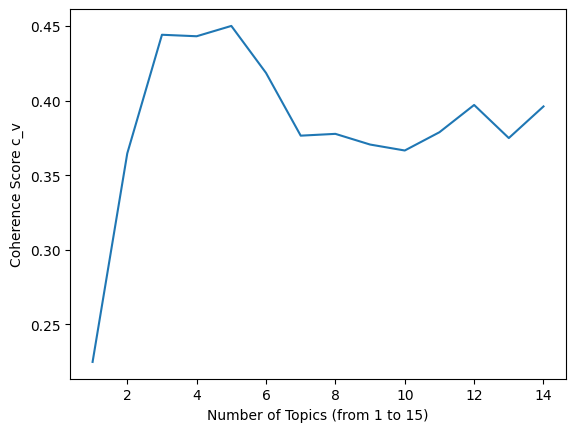

In [8]:
lda_model.plot_optimal_coherent_scores() # potential arguments should be discuss here

In [9]:
# number of topics = 5, another good example is 12 based on the c_v measure
lda_model.create_lda_model(5)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 5 topics, 100 passes over the supplied corpus of 5460 documents, updating every 8000 documents, evaluating every ~5460 documents, iterating 100x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 4 processes
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.003*"uterus" + 0.003*"estradiol" + 0.002*"products" + 0.002*"yourself" + 0.002*"mon

INFO:gensim.models.ldamodel:topic #4 (0.200): 0.003*"alcohol" + 0.003*"come" + 0.003*"desire" + 0.003*"care" + 0.003*"strength" + 0.003*"iud" + 0.003*"times" + 0.002*"hard" + 0.002*"four" + 0.002*"oral"
INFO:gensim.models.ldamodel:topic diff=0.158979, rho=0.359675
INFO:gensim.models.ldamodel:-8.095 per-word bound, 273.5 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.005*"uterus" + 0.005*"estradiol" + 0.003*"ovaries" + 0.003*"iron" + 0.003*"months" + 0.003*"year" + 0.003*"fibroids" + 0.003*"mg" + 0.003*"iodine" + 0.003*"you've"
INFO:gens

INFO:gensim.models.ldamodel:topic diff=0.127551, rho=0.280276
INFO:gensim.models.ldamodel:-7.975 per-word bound, 251.6 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 10, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 10, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 10, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"uterus" + 0.006*"estradiol" + 0.004*"ovaries" + 0.004*"ovarian" + 0.004*"pill" + 0.004*"endometriosis" + 0.003*"year" + 0.003*"months" + 0.003*"fibroids" + 0.003*"natural"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.004*"testosterone" + 0.004*"muscles" + 0.003*"depression" + 0.003*"floor" + 0.003*"gain" + 0.003*"lose" + 0.003*"related" + 0.003*"role" + 0.003*"ma

INFO:gensim.models.ldamodel:topic diff=0.093694, rho=0.237490
INFO:gensim.models.ldamodel:-7.921 per-word bound, 242.3 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 15, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 15, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 15, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"uterus" + 0.006*"estradiol" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"endometriosis" + 0.004*"natural" + 0.004*"year" + 0.003*"months" + 0.003*"fibroids"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.005*"depression" + 0.004*"testosterone" + 0.004*"muscles" + 0.004*"gain" + 0.004*"related" + 0.004*"pressure" + 0.003*"floor" + 0.003*"role" + 0.003

INFO:gensim.models.ldamodel:topic diff=0.068508, rho=0.209749
INFO:gensim.models.ldamodel:-7.895 per-word bound, 238.0 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 20, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 20, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 20, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"uterus" + 0.006*"estradiol" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"endometriosis" + 0.004*"natural" + 0.004*"iud" + 0.004*"lining" + 0.004*"oral"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.005*"depression" + 0.004*"testosterone" + 0.004*"muscles" + 0.004*"related" + 0.004*"pressure" + 0.004*"gain" + 0.004*"factors" + 0.003*"osteoporosis" + 

INFO:gensim.models.ldamodel:topic diff=0.050825, rho=0.189900
INFO:gensim.models.ldamodel:-7.880 per-word bound, 235.6 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 25, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 25, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 25, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"uterus" + 0.006*"estradiol" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"iud" + 0.004*"endometriosis" + 0.004*"natural" + 0.004*"oral" + 0.004*"lining"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.006*"depression" + 0.005*"testosterone" + 0.004*"related" + 0.004*"pressure" + 0.004*"muscles" + 0.004*"gain" + 0.004*"factors" + 0.004*"osteoporosis" + 

INFO:gensim.models.ldamodel:topic diff=0.038707, rho=0.174794
INFO:gensim.models.ldamodel:-7.871 per-word bound, 234.0 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 30, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 30, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 30, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"uterus" + 0.006*"estradiol" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"iud" + 0.004*"oral" + 0.004*"natural" + 0.004*"endometriosis" + 0.004*"lining"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.006*"depression" + 0.005*"related" + 0.005*"testosterone" + 0.004*"pressure" + 0.004*"gain" + 0.004*"factors" + 0.004*"muscles" + 0.004*"vagina" + 0.004*

INFO:gensim.models.ldamodel:topic diff=0.029847, rho=0.162801
INFO:gensim.models.ldamodel:-7.864 per-word bound, 233.0 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 35, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 35, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 35, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"uterus" + 0.006*"estradiol" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"iud" + 0.004*"oral" + 0.004*"natural" + 0.004*"lining" + 0.004*"endometriosis"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.006*"depression" + 0.005*"related" + 0.005*"testosterone" + 0.004*"pressure" + 0.004*"desire" + 0.004*"gain" + 0.004*"factors" + 0.004*"vagina" + 0.004*"

INFO:gensim.models.ldamodel:topic diff=0.023513, rho=0.152980
INFO:gensim.models.ldamodel:-7.860 per-word bound, 232.3 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 40, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 40, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 40, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"uterus" + 0.006*"estradiol" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"iud" + 0.004*"oral" + 0.004*"natural" + 0.004*"lining" + 0.004*"endometriosis"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.006*"depression" + 0.005*"related" + 0.005*"pressure" + 0.004*"testosterone" + 0.004*"desire" + 0.004*"gain" + 0.004*"vagina" + 0.004*"factors" + 0.004*"

INFO:gensim.models.ldamodel:topic diff=0.018991, rho=0.144745
INFO:gensim.models.ldamodel:-7.857 per-word bound, 231.8 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 45, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 45, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 45, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"uterus" + 0.006*"estradiol" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"iud" + 0.004*"oral" + 0.004*"natural" + 0.004*"lining" + 0.004*"endometriosis"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"pressure" + 0.004*"testosterone" + 0.004*"gain" + 0.004*"vagina" + 0.004*"osteoporosis" + 0.

INFO:gensim.models.ldamodel:topic diff=0.015429, rho=0.137712
INFO:gensim.models.ldamodel:-7.854 per-word bound, 231.4 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 50, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 50, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 50, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"uterus" + 0.006*"estradiol" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"iud" + 0.004*"oral" + 0.004*"natural" + 0.004*"lining" + 0.004*"history"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"pressure" + 0.004*"testosterone" + 0.004*"osteoporosis" + 0.004*"gain" + 0.004*"vagina" + 0.004*"f

INFO:gensim.models.ldamodel:topic diff=0.012904, rho=0.131613
INFO:gensim.models.ldamodel:-7.852 per-word bound, 231.0 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 55, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 55, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 55, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"uterus" + 0.006*"estradiol" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"iud" + 0.004*"oral" + 0.004*"natural" + 0.004*"lining" + 0.004*"history"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"pressure" + 0.004*"testosterone" + 0.004*"osteoporosis" + 0.004*"gain" + 0.004*"vagina" + 0.004*"f

INFO:gensim.models.ldamodel:topic diff=0.011004, rho=0.126259
INFO:gensim.models.ldamodel:-7.850 per-word bound, 230.8 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 60, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"estradiol" + 0.006*"uterus" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"oral" + 0.004*"iud" + 0.004*"natural" + 0.004*"lining" + 0.004*"history"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"pressure" + 0.004*"osteoporosis" + 0.004*"testosterone" + 0.004*"gain" + 0.004*"vagina" + 0.004*"f

INFO:gensim.models.ldamodel:topic diff=0.009494, rho=0.121509
INFO:gensim.models.ldamodel:-7.849 per-word bound, 230.6 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 65, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 65, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 65, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"estradiol" + 0.006*"uterus" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"oral" + 0.004*"iud" + 0.004*"natural" + 0.004*"lining" + 0.004*"history"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"pressure" + 0.004*"osteoporosis" + 0.004*"testosterone" + 0.004*"vagina" + 0.004*"gain" + 0.004*"t

INFO:gensim.models.ldamodel:topic diff=0.008243, rho=0.117258
INFO:gensim.models.ldamodel:-7.848 per-word bound, 230.4 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 70, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 70, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 70, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"estradiol" + 0.006*"uterus" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"oral" + 0.004*"iud" + 0.004*"natural" + 0.004*"lining" + 0.004*"history"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"pressure" + 0.005*"osteoporosis" + 0.004*"testosterone" + 0.004*"vagina" + 0.004*"gain" + 0.004*"t

INFO:gensim.models.ldamodel:topic diff=0.007226, rho=0.113424
INFO:gensim.models.ldamodel:-7.847 per-word bound, 230.2 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 75, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 75, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 75, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"estradiol" + 0.006*"uterus" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"oral" + 0.004*"iud" + 0.004*"natural" + 0.004*"lining" + 0.004*"history"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"osteoporosis" + 0.005*"pressure" + 0.004*"testosterone" + 0.004*"vagina" + 0.004*"tissues" + 0.004

INFO:gensim.models.ldamodel:topic diff=0.006355, rho=0.109943
INFO:gensim.models.ldamodel:-7.846 per-word bound, 230.1 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 80, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 80, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 80, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"estradiol" + 0.006*"uterus" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"oral" + 0.004*"iud" + 0.004*"natural" + 0.004*"lining" + 0.004*"history"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"osteoporosis" + 0.005*"pressure" + 0.004*"testosterone" + 0.004*"tissues" + 0.004*"vagina" + 0.004

INFO:gensim.models.ldamodel:topic diff=0.005627, rho=0.106764
INFO:gensim.models.ldamodel:-7.845 per-word bound, 230.0 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 85, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 85, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 85, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"estradiol" + 0.006*"uterus" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"oral" + 0.004*"iud" + 0.004*"natural" + 0.004*"lining" + 0.004*"history"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"osteoporosis" + 0.005*"pressure" + 0.004*"tissues" + 0.004*"vagina" + 0.004*"testosterone" + 0.004

INFO:gensim.models.ldamodel:topic diff=0.005013, rho=0.103846
INFO:gensim.models.ldamodel:-7.844 per-word bound, 229.8 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 90, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 90, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 90, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"estradiol" + 0.006*"uterus" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"oral" + 0.004*"iud" + 0.004*"natural" + 0.004*"lining" + 0.004*"history"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"osteoporosis" + 0.005*"pressure" + 0.004*"tissues" + 0.004*"vagina" + 0.004*"testosterone" + 0.004

INFO:gensim.models.ldamodel:topic diff=0.004506, rho=0.101155
INFO:gensim.models.ldamodel:-7.844 per-word bound, 229.7 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 95, dispatched chunk #0 = documents up to #2000/5460, outstanding queue size 1
INFO:gensim.models.ldamulticore:PROGRESS: pass 95, dispatched chunk #1 = documents up to #4000/5460, outstanding queue size 2
INFO:gensim.models.ldamulticore:PROGRESS: pass 95, dispatched chunk #2 = documents up to #5460/5460, outstanding queue size 3
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"estradiol" + 0.006*"uterus" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"oral" + 0.004*"iud" + 0.004*"natural" + 0.004*"history" + 0.004*"lining"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"osteoporosis" + 0.005*"pressure" + 0.004*"tissues" + 0.004*"vagina" + 0.004*"testosterone" + 0.004

INFO:gensim.models.ldamodel:topic diff=0.004094, rho=0.098662
INFO:gensim.models.ldamodel:-7.843 per-word bound, 229.6 perplexity estimate based on a held-out corpus of 1460 documents with 29566 words
INFO:gensim.utils:LdaMulticore lifecycle event {'msg': 'trained LdaMulticore<num_terms=4000, num_topics=5, decay=0.5, chunksize=2000> in 81.10s', 'datetime': '2023-06-10T15:13:00.220590', 'gensim': '4.3.1', 'python': '3.11.3 (main, May 15 2023, 10:43:03) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.006*"estradiol" + 0.006*"uterus" + 0.005*"pill" + 0.005*"ovarian" + 0.005*"ovaries" + 0.004*"oral" + 0.004*"iud" + 0.004*"natural" + 0.004*"history" + 0.004*"lining"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.007*"depression" + 0.005*"related" + 0.005*"desire" + 0.005*"osteoporosis" + 0.005*"pressure" + 0.004*"tissues" + 0.004*"vagina" + 0.004*"gain" + 0.004*"testosterone" + 0.004*"factors"
INFO:gensim.mo

In [10]:
# add topics to dataframe - for each paragraph
lda_model.format_topics_sentences()
lda_model.df.head()  # checking the first five records

,book,chapter,paragraph_number,paragraph,dominant_topic,perc_contribution,topic_keywords
0,Hormone Repair Manual,1,1,Hormone revolution:\n\n\n\n\n\nwhy everything ...,3,0.7124,"talk, got, i'd, said, thought, old, bit, thing..."
1,Hormone Repair Manual,1,2,This book is about both the process of perimen...,4,0.4186,"strength, floor, muscles, week, minutes, hard,..."
2,Hormone Repair Manual,1,3,"First, understand that symptoms (if you experi...",3,0.6355,"talk, got, i'd, said, thought, old, bit, thing..."
3,Hormone Repair Manual,1,4,"Next, understand that perimenopause is not jus...",4,0.6494,"strength, floor, muscles, week, minutes, hard,..."
4,Hormone Repair Manual,1,5,"Finally, know that perimenopause and the early...",1,0.7654,"depression, related, desire, osteoporosis, pre..."


In [11]:
all_lda_df = lda_model.df

## Sentiments
Extract the sentiments of each paragraph. Approach is very simple, when we segment the paragraph into sentences using Spacy library, then we predict sentiment of each sentence:
- if all neutral -> neutral
- if all positive -> positive
- if all negative -> negative
- if positive/negative > 1.5 -> positive
- if negative/positive > 1.5 -> negative
- else -> neutral

In [12]:
from sentiment import Sentiment
sentiment_model = Sentiment(all_lda_df)

In [13]:
sentiment_model.predict()  # this will take some time to finish, be patient :)

In [15]:
sentiment_model.df.head()

,book,chapter,paragraph_number,paragraph,dominant_topic,perc_contribution,topic_keywords,sentiment
0,Hormone Repair Manual,1,1,Hormone revolution:\n\n\n\n\n\nwhy everything ...,3,0.7124,"talk, got, i'd, said, thought, old, bit, thing...",POSITIVE
1,Hormone Repair Manual,1,2,This book is about both the process of perimen...,4,0.4186,"strength, floor, muscles, week, minutes, hard,...",POSITIVE
2,Hormone Repair Manual,1,3,"First, understand that symptoms (if you experi...",3,0.6355,"talk, got, i'd, said, thought, old, bit, thing...",POSITIVE
3,Hormone Repair Manual,1,4,"Next, understand that perimenopause is not jus...",4,0.6494,"strength, floor, muscles, week, minutes, hard,...",NEGATIVE
4,Hormone Repair Manual,1,5,"Finally, know that perimenopause and the early...",1,0.7654,"depression, related, desire, osteoporosis, pre...",POSITIVE


In [ ]:
sentiment_model.export_to_csv()

## Visualization

Vis object :)

In [32]:
from vis import Vis
vis = Vis(sentiment=sentiment_model, lda=lda_model)

In [104]:
vis.treemap_chapter_sentiments()  # treemap of chapter -> sentiments

In [105]:
vis.treemap_chapter_topic()  # treemap of chapter -> topics

{'(?)': 'lightgrey', '3': '#fd7f6f', '4': '#7eb0d5', '1': '#b2e061', '0': '#bd7ebe', '2': '#ffb55a'}


In [ ]:
vis.treemap_topic_sentiment()  # treemap of topics -> sentiments

In [ ]:
vis.pyviz_topics()  # pyVis topic analysis